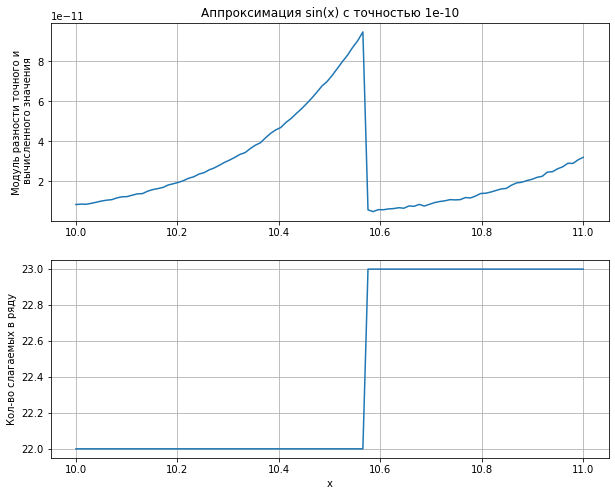

In [20]:
#Гл.1 № 8.19
import numpy as np
import matplotlib.pyplot as plt
e = 10**(-10)

def get_fact(n):
    if n == 0:
        return 1
    else:
        return n*get_fact(n-1)

def get_sin(x):
    n = 1
    s = 0
    q = x
    while abs(q) > e:
        s = s + q
        q = q * (-1) * (x*x) / ((2*n+1) * (2*n))
        n += 1
    return s, n-1

x = np.linspace(10, 11, num=100)
np_sin = np.sin(x)
approx_sin = np.array([get_sin(i) for i in x])

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)

plt.subplot(211)
plt.plot(x, np.abs(approx_sin[:,0] - np_sin))
plt.title(f'Аппроксимация sin(x) c точностью {e}')
plt.ylabel("Модуль разности точного и\n вычисленного значения")
plt.grid()

plt.subplot(212)
plt.plot(x, approx_sin[:,1])
plt.ylabel("Кол-во слагаемых в ряду")
plt.xlabel("x")
plt.grid()
plt.show()

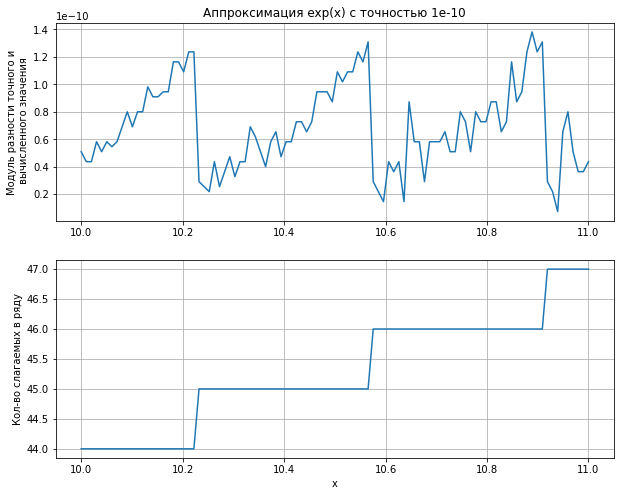

In [22]:
e = 10**(-10)
def get_exp(x):
    n = 1
    s = 0
    q = 1
    while abs(q) > e:
        s = s + q
        q = q * (x) / (n)
        n += 1
    return s, n-1

np_exp = np.exp(x)
approx_exp = np.array([get_exp(i) for i in x])

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)

plt.subplot(211)
plt.plot(x, np.abs(approx_exp[:,0] - np_exp))
plt.title(f'Аппроксимация exp(x) c точностью {e}')
plt.ylabel("Модуль разности точного и\n вычисленного значения")
plt.grid()

plt.subplot(212)
plt.plot(x, approx_exp[:,1])
plt.ylabel("Кол-во слагаемых в ряду")
plt.xlabel("x")
plt.grid()
plt.show()

In [19]:
#Гл.4 № 12.8(б)
import numpy as np
eps = 10**(-3)


x_1 = [1/2, 1/(2*np.sqrt(2)) * np.exp(0.25 - 1/2)]
i = 0
while abs(x_1[i+1] - x_1[i]) >= eps/2:
    x_1.append(1/(2*np.sqrt(2)) * np.exp(x_1[i+1]**2 - 1/2))
    i+=1
print(i)
print(x_1)

x_2 = [1, np.sqrt(1/2 + np.log(np.sqrt(8) * 1))]
i = 0
while abs(x_2[i+1] - x_2[i]) >= eps/2:
    x_2.append(np.sqrt(1/2 + np.log(np.sqrt(8) * x_2[i+1])))
    i+=1
print(i)
print(x_2)
print(x_2[-1] - x_1[-1])

4
[0.5, 0.27534765745159184, 0.23133129038392647, 0.22622920665129587, 0.2257016878497745, 0.22564788651952186]
6
[1, 1.240854854864145, 1.3249608718805486, 1.3494827524595767, 1.3562603524193682, 1.3581060128862144, 1.35860658852489, 1.3587422044298716]
1.1330943179103496


In [33]:
#Гл.6 № 9.32(б)
#Newton

def get_dif(x, f):
    if len(f) > 2:
        f_left = f.copy()[1:]
        x_left = x.copy()[1:]
        f_right = f.copy()[:-1]
        x_right = x.copy()[:-1]
        return (get_dif(x_left, f_left) - get_dif(x_right, f_right)) / (x[-1] - x[0])
    elif len(f) == 2:
        return (f[1] - f[0]) / (x[1] - x[0])
        
        
def get_val(x_list, f_list, x):
    res = f_list[0]
    diffs = [f_list[0]] # Разделенные разности
    for i in range(1, len(f_list)):
        buf = 1
        x_temp = []
        f_temp = []
        for j in range(i+1):
            x_temp.append(x_list[j])
            f_temp.append(f_list[j])
            if j < i:
                buf *= (x - x_list[j])
        diffs.append(get_dif(x_temp, f_temp))
        res += get_dif(x_temp, f_temp) * buf
    return res, diffs    


In [53]:
years = np.arange(1910, 2010, 10)

people = [92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805,248709873, 281421906]

(_, diffs) = get_val(years, people, 1999)
print('Разделенные разности:', diffs)

Разделенные разности: [92228496, 1379304.1, 16940.229999999992, -1934.531333333333, 125.10672500000001, -4.150598, 0.08056541666666665, -0.0007564852777777771, -7.564675347222239e-06, 5.099328042328045e-07]


In [52]:
print("Экстраполированное значение:", get_val(years, people, 2010)[0])

Экстраполированное значение: 827906509.0000029
